In [20]:
def func(i,m,year,month,day,tbefore,tafter):
    import pandas
    import datetime
    from datetime import timedelta
    import pandas_datareader.data as web
    import fix_yahoo_finance as yf
    import matplotlib.pyplot as plt
    import numpy as np
    import statsmodels.api as sm
    event_date = datetime.datetime(year,month,day)
    start_date = event_date - timedelta(days = tbefore)
    end_date = event_date + timedelta(days = tafter)
    df = web.DataReader([i, m],'yahoo', start_date,end_date)
    df = df['Close']
    rets = df.pct_change()
    %matplotlib inline
    plt.scatter(rets[i],rets[m])
    X = rets[i]    
    X = sm.add_constant(X)
    y = rets[m]
    model = sm.OLS(y,X,missing='drop')
    result = model.fit()
    print(result.summary())
    (a,b) = result.params
    fig, ax = plt.subplots(figsize=(12,10))
    ax.plot(y)
    ax.plot(result.fittedvalues)
    rets['u'] = rets[i] - rets[m]*b - a
    rets['cumu'] = rets['u'].cumsum()
    fig, ax = plt.subplots(figsize=(12,10))
    ax.plot(rets['cumu'])
    return rets

                            OLS Regression Results                            
Dep. Variable:                  ^IXIC   R-squared:                       0.718
Model:                            OLS   Adj. R-squared:                  0.695
Method:                 Least Squares   F-statistic:                     30.61
Date:                Thu, 15 Nov 2018   Prob (F-statistic):           0.000129
Time:                        23:47:57   Log-Likelihood:                 53.142
No. Observations:                  14   AIC:                            -102.3
Df Residuals:                      12   BIC:                            -101.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0007      0.002     -0.435      0.6

/Users/amber/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1394: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=14
  "anyway, n=%i" % int(n))


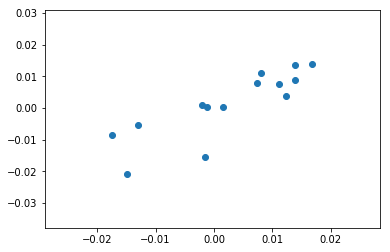

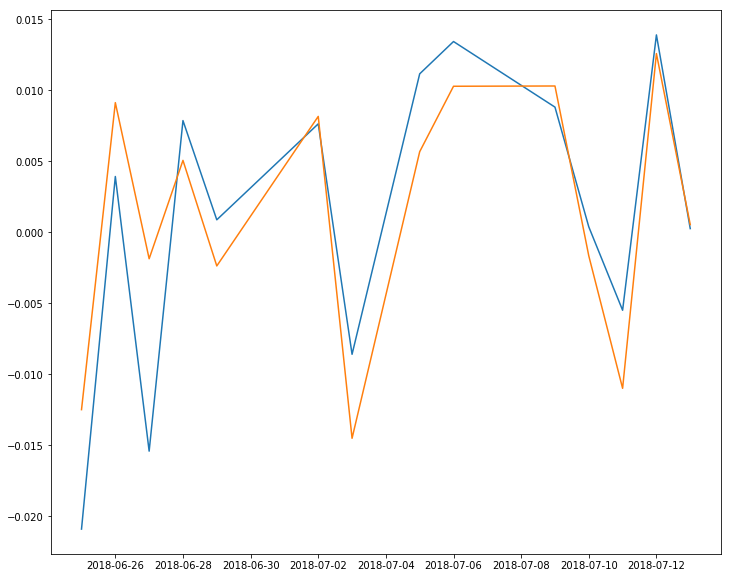

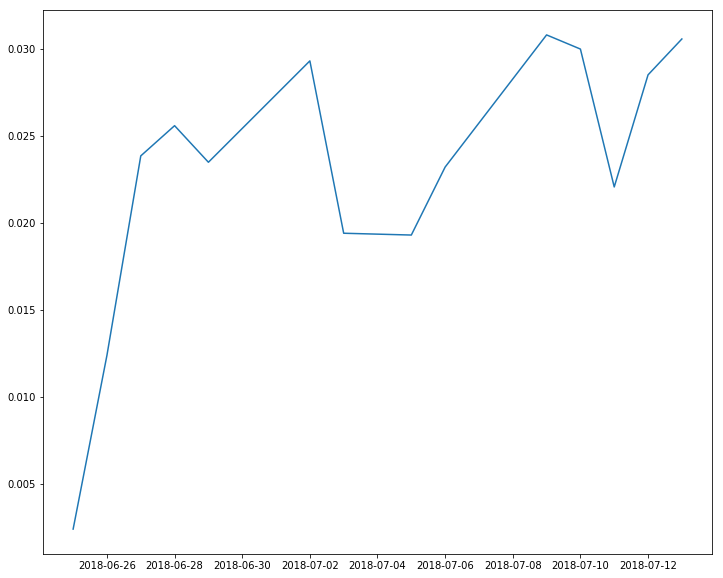

In [11]:
func('AAPL', '^IXIC',2018,7,2, 10, 10)

                            OLS Regression Results                            
Dep. Variable:                  ^IXIC   R-squared:                       0.946
Model:                            OLS   Adj. R-squared:                  0.932
Method:                 Least Squares   F-statistic:                     69.98
Date:                Thu, 15 Nov 2018   Prob (F-statistic):            0.00112
Time:                        15:34:28   Log-Likelihood:                 29.708
No. Observations:                   6   AIC:                            -55.42
Df Residuals:                       4   BIC:                            -55.83
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0030      0.001      3.382      0.0

/Users/amber/anaconda3/lib/python3.6/site-packages/statsmodels/stats/stattools.py:72: ValueWarning: omni_normtest is not valid with less than 8 observations; 6 samples were given.
  "samples were given." % int(n), ValueWarning)


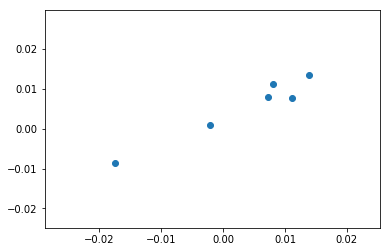

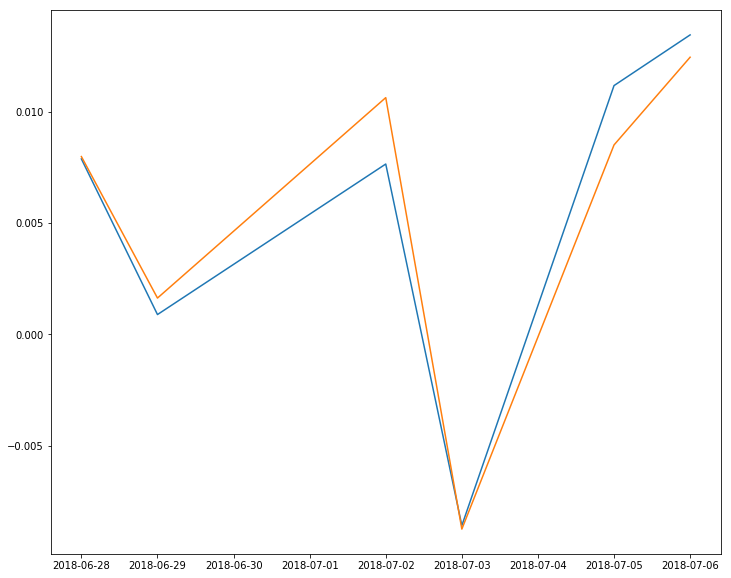

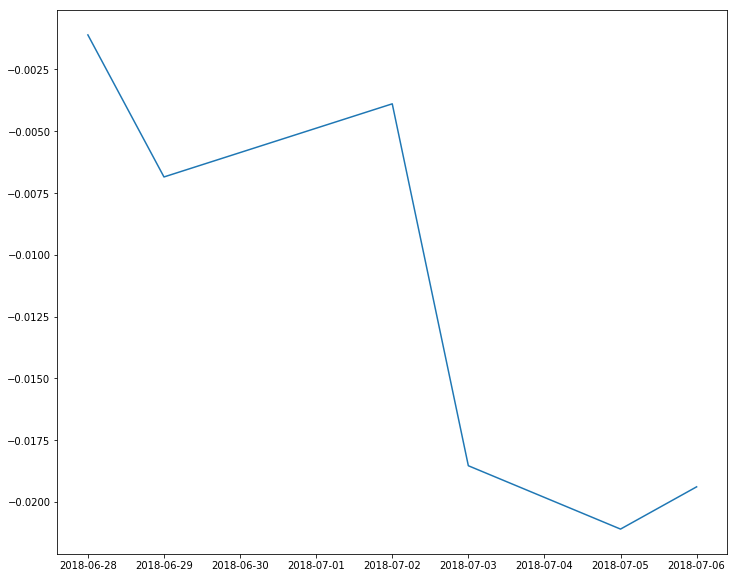

In [26]:
func('AAPL', '^IXIC',2018,7,2, 5, 5)

                            OLS Regression Results                            
Dep. Variable:                  ^IXIC   R-squared:                       0.362
Model:                            OLS   Adj. R-squared:                  0.346
Method:                 Least Squares   F-statistic:                     22.70
Date:                Thu, 15 Nov 2018   Prob (F-statistic):           2.50e-05
Time:                        15:34:59   Log-Likelihood:                 152.05
No. Observations:                  42   AIC:                            -300.1
Df Residuals:                      40   BIC:                            -296.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -8.484e-05      0.001     -0.082      0.9

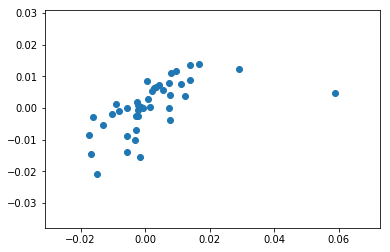

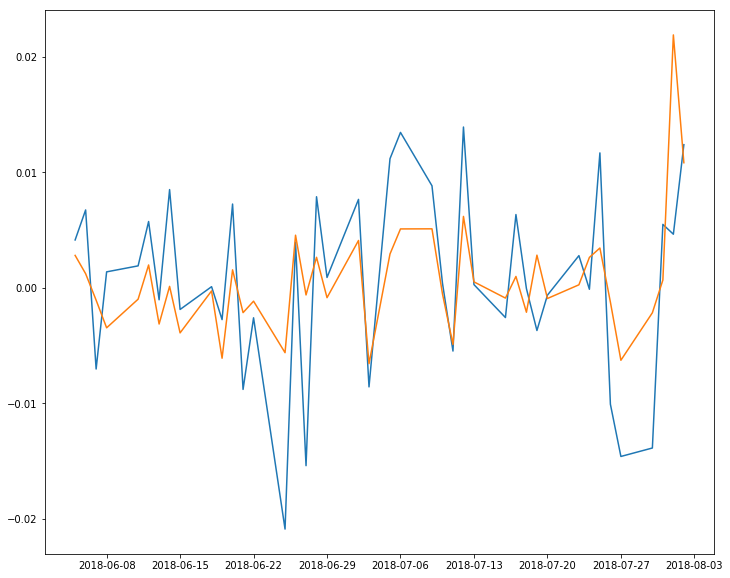

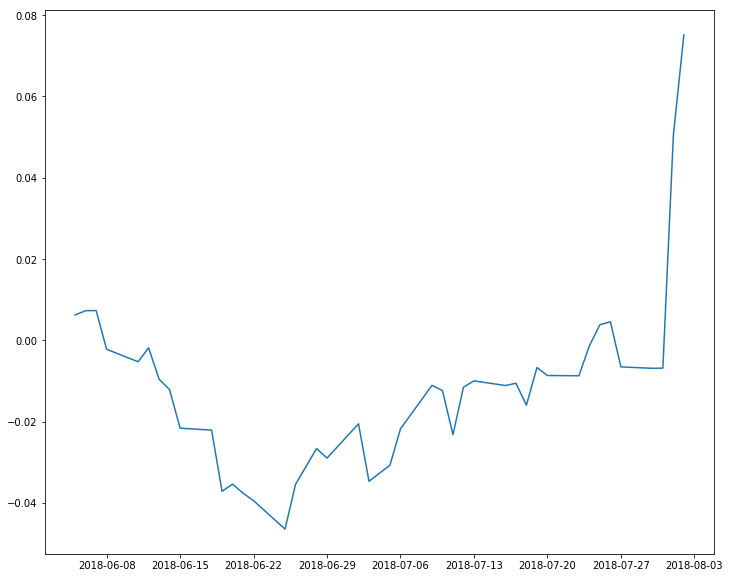

In [27]:
func('AAPL', '^IXIC',2018,7,2, 30, 30)

In [15]:
import numpy as np
import pandas as pd
filecombine = '/Users/amber/Desktop/Tools for analytics/Fed events v3.csv'
data = pd.read_csv(filecombine)
data.head()


,Event,Year,Month,Day,Company Name,Ticker,Market,Industry
0,Fed Rate Hike,2015,12,16,DowDuPont Inc.,DWDP,^DJI,Basic Materials (Chemicals)
1,Fed Rate Hike,2015,12,16,3M Co.,MMM,^DJI,Business/Consumer Services
2,Fed Rate Hike,2015,12,16,International Business Machines Corp.,IBM,^DJI,Business/Consumer Services
3,Fed Rate Hike,2015,12,16,Exxon Mobil Corp.,XOM,^DJI,Energy
4,Fed Rate Hike,2015,12,16,Chevron Corp.,CVX,^DJI,Energy


In [16]:
len(data)

240

In [19]:
i = data.loc[1]['Ticker']
i

'MMM'

/Users/amber/anaconda3/lib/python3.6/site-packages/statsmodels/stats/stattools.py:72: ValueWarning: omni_normtest is not valid with less than 8 observations; 7 samples were given.
  "samples were given." % int(n), ValueWarning)


                            OLS Regression Results                            
Dep. Variable:                   ^DJI   R-squared:                       0.060
Model:                            OLS   Adj. R-squared:                 -0.128
Method:                 Least Squares   F-statistic:                    0.3200
Date:                Sun, 18 Nov 2018   Prob (F-statistic):              0.596
Time:                        19:36:14   Log-Likelihood:                 21.081
No. Observations:                   7   AIC:                            -38.16
Df Residuals:                       5   BIC:                            -38.27
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0021      0.005      0.380      0.7

/Users/amber/anaconda3/lib/python3.6/site-packages/statsmodels/stats/stattools.py:72: ValueWarning: omni_normtest is not valid with less than 8 observations; 7 samples were given.
  "samples were given." % int(n), ValueWarning)


                            OLS Regression Results                            
Dep. Variable:                   ^DJI   R-squared:                       0.016
Model:                            OLS   Adj. R-squared:                 -0.180
Method:                 Least Squares   F-statistic:                   0.08365
Date:                Sun, 18 Nov 2018   Prob (F-statistic):              0.784
Time:                        19:36:15   Log-Likelihood:                 20.922
No. Observations:                   7   AIC:                            -37.84
Df Residuals:                       5   BIC:                            -37.95
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0017      0.006      0.298      0.7

/Users/amber/anaconda3/lib/python3.6/site-packages/statsmodels/stats/stattools.py:72: ValueWarning: omni_normtest is not valid with less than 8 observations; 7 samples were given.
  "samples were given." % int(n), ValueWarning)


                            OLS Regression Results                            
Dep. Variable:                   ^DJI   R-squared:                       0.869
Model:                            OLS   Adj. R-squared:                  0.842
Method:                 Least Squares   F-statistic:                     33.09
Date:                Sun, 18 Nov 2018   Prob (F-statistic):            0.00223
Time:                        19:36:17   Log-Likelihood:                 27.970
No. Observations:                   7   AIC:                            -51.94
Df Residuals:                       5   BIC:                            -52.05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0019      0.002     -0.903      0.4

/Users/amber/anaconda3/lib/python3.6/site-packages/statsmodels/stats/stattools.py:72: ValueWarning: omni_normtest is not valid with less than 8 observations; 7 samples were given.
  "samples were given." % int(n), ValueWarning)


                            OLS Regression Results                            
Dep. Variable:                   ^DJI   R-squared:                       0.284
Model:                            OLS   Adj. R-squared:                  0.141
Method:                 Least Squares   F-statistic:                     1.986
Date:                Sun, 18 Nov 2018   Prob (F-statistic):              0.218
Time:                        19:36:19   Log-Likelihood:                 22.034
No. Observations:                   7   AIC:                            -40.07
Df Residuals:                       5   BIC:                            -40.18
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0009      0.005     -0.177      0.8

/Users/amber/anaconda3/lib/python3.6/site-packages/statsmodels/stats/stattools.py:72: ValueWarning: omni_normtest is not valid with less than 8 observations; 7 samples were given.
  "samples were given." % int(n), ValueWarning)


                            OLS Regression Results                            
Dep. Variable:                   ^DJI   R-squared:                       0.421
Model:                            OLS   Adj. R-squared:                  0.305
Method:                 Least Squares   F-statistic:                     3.630
Date:                Sun, 18 Nov 2018   Prob (F-statistic):              0.115
Time:                        19:36:20   Log-Likelihood:                 22.774
No. Observations:                   7   AIC:                            -41.55
Df Residuals:                       5   BIC:                            -41.66
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0010      0.004     -0.220      0.8

/Users/amber/anaconda3/lib/python3.6/site-packages/statsmodels/stats/stattools.py:72: ValueWarning: omni_normtest is not valid with less than 8 observations; 7 samples were given.
  "samples were given." % int(n), ValueWarning)


                            OLS Regression Results                            
Dep. Variable:                   ^DJI   R-squared:                       0.925
Model:                            OLS   Adj. R-squared:                  0.911
Method:                 Least Squares   F-statistic:                     62.04
Date:                Sun, 18 Nov 2018   Prob (F-statistic):           0.000530
Time:                        19:36:21   Log-Likelihood:                 29.949
No. Observations:                   7   AIC:                            -55.90
Df Residuals:                       5   BIC:                            -56.01
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0014      0.002     -0.916      0.4

/Users/amber/anaconda3/lib/python3.6/site-packages/statsmodels/stats/stattools.py:72: ValueWarning: omni_normtest is not valid with less than 8 observations; 7 samples were given.
  "samples were given." % int(n), ValueWarning)


                            OLS Regression Results                            
Dep. Variable:                   ^DJI   R-squared:                       0.915
Model:                            OLS   Adj. R-squared:                  0.899
Method:                 Least Squares   F-statistic:                     54.13
Date:                Sun, 18 Nov 2018   Prob (F-statistic):           0.000729
Time:                        19:36:22   Log-Likelihood:                 29.509
No. Observations:                   7   AIC:                            -55.02
Df Residuals:                       5   BIC:                            -55.13
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0056      0.002     -3.002      0.0

/Users/amber/anaconda3/lib/python3.6/site-packages/statsmodels/stats/stattools.py:72: ValueWarning: omni_normtest is not valid with less than 8 observations; 7 samples were given.
  "samples were given." % int(n), ValueWarning)


                            OLS Regression Results                            
Dep. Variable:                   ^DJI   R-squared:                       0.941
Model:                            OLS   Adj. R-squared:                  0.929
Method:                 Least Squares   F-statistic:                     79.25
Date:                Sun, 18 Nov 2018   Prob (F-statistic):           0.000298
Time:                        19:36:24   Log-Likelihood:                 30.749
No. Observations:                   7   AIC:                            -57.50
Df Residuals:                       5   BIC:                            -57.61
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0018      0.001     -1.310      0.2

/Users/amber/anaconda3/lib/python3.6/site-packages/statsmodels/stats/stattools.py:72: ValueWarning: omni_normtest is not valid with less than 8 observations; 7 samples were given.
  "samples were given." % int(n), ValueWarning)


                            OLS Regression Results                            
Dep. Variable:                   ^DJI   R-squared:                       0.874
Model:                            OLS   Adj. R-squared:                  0.848
Method:                 Least Squares   F-statistic:                     34.58
Date:                Sun, 18 Nov 2018   Prob (F-statistic):            0.00202
Time:                        19:36:25   Log-Likelihood:                 28.104
No. Observations:                   7   AIC:                            -52.21
Df Residuals:                       5   BIC:                            -52.32
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0013      0.002      0.648      0.5

/Users/amber/anaconda3/lib/python3.6/site-packages/statsmodels/stats/stattools.py:72: ValueWarning: omni_normtest is not valid with less than 8 observations; 7 samples were given.
  "samples were given." % int(n), ValueWarning)


                            OLS Regression Results                            
Dep. Variable:                   ^DJI   R-squared:                       0.882
Model:                            OLS   Adj. R-squared:                  0.858
Method:                 Least Squares   F-statistic:                     37.36
Date:                Sun, 18 Nov 2018   Prob (F-statistic):            0.00170
Time:                        19:36:27   Log-Likelihood:                 28.343
No. Observations:                   7   AIC:                            -52.69
Df Residuals:                       5   BIC:                            -52.79
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0004      0.002     -0.187      0.8

/Users/amber/anaconda3/lib/python3.6/site-packages/statsmodels/stats/stattools.py:72: ValueWarning: omni_normtest is not valid with less than 8 observations; 7 samples were given.
  "samples were given." % int(n), ValueWarning)


                            OLS Regression Results                            
Dep. Variable:                   ^DJI   R-squared:                       0.883
Model:                            OLS   Adj. R-squared:                  0.859
Method:                 Least Squares   F-statistic:                     37.58
Date:                Sun, 18 Nov 2018   Prob (F-statistic):            0.00168
Time:                        19:36:28   Log-Likelihood:                 28.361
No. Observations:                   7   AIC:                            -52.72
Df Residuals:                       5   BIC:                            -52.83
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0002      0.002     -0.110      0.9

/Users/amber/anaconda3/lib/python3.6/site-packages/statsmodels/stats/stattools.py:72: ValueWarning: omni_normtest is not valid with less than 8 observations; 7 samples were given.
  "samples were given." % int(n), ValueWarning)


                            OLS Regression Results                            
Dep. Variable:                   ^DJI   R-squared:                       0.575
Model:                            OLS   Adj. R-squared:                  0.490
Method:                 Least Squares   F-statistic:                     6.776
Date:                Sun, 18 Nov 2018   Prob (F-statistic):             0.0481
Time:                        19:36:30   Log-Likelihood:                 23.862
No. Observations:                   7   AIC:                            -43.72
Df Residuals:                       5   BIC:                            -43.83
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       5.421e-05      0.004      0.015      0.9

/Users/amber/anaconda3/lib/python3.6/site-packages/statsmodels/stats/stattools.py:72: ValueWarning: omni_normtest is not valid with less than 8 observations; 7 samples were given.
  "samples were given." % int(n), ValueWarning)


                            OLS Regression Results                            
Dep. Variable:                   ^DJI   R-squared:                       0.828
Model:                            OLS   Adj. R-squared:                  0.794
Method:                 Least Squares   F-statistic:                     24.12
Date:                Sun, 18 Nov 2018   Prob (F-statistic):            0.00443
Time:                        19:36:31   Log-Likelihood:                 27.031
No. Observations:                   7   AIC:                            -50.06
Df Residuals:                       5   BIC:                            -50.17
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0008      0.002     -0.353      0.7

/Users/amber/anaconda3/lib/python3.6/site-packages/statsmodels/stats/stattools.py:72: ValueWarning: omni_normtest is not valid with less than 8 observations; 7 samples were given.
  "samples were given." % int(n), ValueWarning)


                            OLS Regression Results                            
Dep. Variable:                   ^DJI   R-squared:                       0.927
Model:                            OLS   Adj. R-squared:                  0.912
Method:                 Least Squares   F-statistic:                     63.36
Date:                Sun, 18 Nov 2018   Prob (F-statistic):           0.000505
Time:                        19:36:32   Log-Likelihood:                 30.018
No. Observations:                   7   AIC:                            -56.04
Df Residuals:                       5   BIC:                            -56.14
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0014      0.002     -0.932      0.3

/Users/amber/anaconda3/lib/python3.6/site-packages/statsmodels/stats/stattools.py:72: ValueWarning: omni_normtest is not valid with less than 8 observations; 7 samples were given.
  "samples were given." % int(n), ValueWarning)


                            OLS Regression Results                            
Dep. Variable:                   ^DJI   R-squared:                       0.781
Model:                            OLS   Adj. R-squared:                  0.737
Method:                 Least Squares   F-statistic:                     17.83
Date:                Sun, 18 Nov 2018   Prob (F-statistic):            0.00830
Time:                        19:36:33   Log-Likelihood:                 26.180
No. Observations:                   7   AIC:                            -48.36
Df Residuals:                       5   BIC:                            -48.47
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       3.097e-05      0.003      0.012      0.9

/Users/amber/anaconda3/lib/python3.6/site-packages/statsmodels/stats/stattools.py:72: ValueWarning: omni_normtest is not valid with less than 8 observations; 7 samples were given.
  "samples were given." % int(n), ValueWarning)


                            OLS Regression Results                            
Dep. Variable:                   ^DJI   R-squared:                       0.865
Model:                            OLS   Adj. R-squared:                  0.838
Method:                 Least Squares   F-statistic:                     32.00
Date:                Sun, 18 Nov 2018   Prob (F-statistic):            0.00240
Time:                        19:36:35   Log-Likelihood:                 27.868
No. Observations:                   7   AIC:                            -51.74
Df Residuals:                       5   BIC:                            -51.84
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0013      0.002      0.664      0.5

/Users/amber/anaconda3/lib/python3.6/site-packages/statsmodels/stats/stattools.py:72: ValueWarning: omni_normtest is not valid with less than 8 observations; 7 samples were given.
  "samples were given." % int(n), ValueWarning)


                            OLS Regression Results                            
Dep. Variable:                   ^DJI   R-squared:                       0.728
Model:                            OLS   Adj. R-squared:                  0.674
Method:                 Least Squares   F-statistic:                     13.40
Date:                Sun, 18 Nov 2018   Prob (F-statistic):             0.0146
Time:                        19:36:36   Log-Likelihood:                 25.425
No. Observations:                   7   AIC:                            -46.85
Df Residuals:                       5   BIC:                            -46.96
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0013      0.003     -0.440      0.6

/Users/amber/anaconda3/lib/python3.6/site-packages/statsmodels/stats/stattools.py:72: ValueWarning: omni_normtest is not valid with less than 8 observations; 7 samples were given.
  "samples were given." % int(n), ValueWarning)


                            OLS Regression Results                            
Dep. Variable:                   ^DJI   R-squared:                       0.795
Model:                            OLS   Adj. R-squared:                  0.754
Method:                 Least Squares   F-statistic:                     19.40
Date:                Sun, 18 Nov 2018   Prob (F-statistic):            0.00699
Time:                        19:36:38   Log-Likelihood:                 26.411
No. Observations:                   7   AIC:                            -48.82
Df Residuals:                       5   BIC:                            -48.93
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0008      0.003     -0.297      0.7

/Users/amber/anaconda3/lib/python3.6/site-packages/statsmodels/stats/stattools.py:72: ValueWarning: omni_normtest is not valid with less than 8 observations; 7 samples were given.
  "samples were given." % int(n), ValueWarning)


                            OLS Regression Results                            
Dep. Variable:                   ^DJI   R-squared:                       0.368
Model:                            OLS   Adj. R-squared:                  0.242
Method:                 Least Squares   F-statistic:                     2.915
Date:                Sun, 18 Nov 2018   Prob (F-statistic):              0.148
Time:                        19:36:39   Log-Likelihood:                 22.471
No. Observations:                   7   AIC:                            -40.94
Df Residuals:                       5   BIC:                            -41.05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0007      0.005     -0.155      0.8

/Users/amber/anaconda3/lib/python3.6/site-packages/statsmodels/stats/stattools.py:72: ValueWarning: omni_normtest is not valid with less than 8 observations; 7 samples were given.
  "samples were given." % int(n), ValueWarning)


                            OLS Regression Results                            
Dep. Variable:                   ^DJI   R-squared:                       0.795
Model:                            OLS   Adj. R-squared:                  0.754
Method:                 Least Squares   F-statistic:                     19.37
Date:                Sun, 18 Nov 2018   Prob (F-statistic):            0.00701
Time:                        19:36:41   Log-Likelihood:                 26.408
No. Observations:                   7   AIC:                            -48.82
Df Residuals:                       5   BIC:                            -48.92
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0024      0.002      0.957      0.3

/Users/amber/anaconda3/lib/python3.6/site-packages/statsmodels/stats/stattools.py:72: ValueWarning: omni_normtest is not valid with less than 8 observations; 7 samples were given.
  "samples were given." % int(n), ValueWarning)


                            OLS Regression Results                            
Dep. Variable:                   ^DJI   R-squared:                       0.735
Model:                            OLS   Adj. R-squared:                  0.682
Method:                 Least Squares   F-statistic:                     13.89
Date:                Sun, 18 Nov 2018   Prob (F-statistic):             0.0136
Time:                        19:36:43   Log-Likelihood:                 25.515
No. Observations:                   7   AIC:                            -47.03
Df Residuals:                       5   BIC:                            -47.14
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0026      0.003     -0.863      0.4

/Users/amber/anaconda3/lib/python3.6/site-packages/statsmodels/stats/stattools.py:72: ValueWarning: omni_normtest is not valid with less than 8 observations; 7 samples were given.
  "samples were given." % int(n), ValueWarning)


                            OLS Regression Results                            
Dep. Variable:                   ^DJI   R-squared:                       0.723
Model:                            OLS   Adj. R-squared:                  0.668
Method:                 Least Squares   F-statistic:                     13.07
Date:                Sun, 18 Nov 2018   Prob (F-statistic):             0.0153
Time:                        19:36:46   Log-Likelihood:                 25.361
No. Observations:                   7   AIC:                            -46.72
Df Residuals:                       5   BIC:                            -46.83
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0021      0.003      0.732      0.4

/Users/amber/anaconda3/lib/python3.6/site-packages/statsmodels/stats/stattools.py:72: ValueWarning: omni_normtest is not valid with less than 8 observations; 7 samples were given.
  "samples were given." % int(n), ValueWarning)


                            OLS Regression Results                            
Dep. Variable:                   ^DJI   R-squared:                       0.577
Model:                            OLS   Adj. R-squared:                  0.492
Method:                 Least Squares   F-statistic:                     6.811
Date:                Sun, 18 Nov 2018   Prob (F-statistic):             0.0477
Time:                        19:36:47   Log-Likelihood:                 23.872
No. Observations:                   7   AIC:                            -43.74
Df Residuals:                       5   BIC:                            -43.85
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0003      0.004     -0.086      0.9

/Users/amber/anaconda3/lib/python3.6/site-packages/statsmodels/stats/stattools.py:72: ValueWarning: omni_normtest is not valid with less than 8 observations; 7 samples were given.
  "samples were given." % int(n), ValueWarning)


                            OLS Regression Results                            
Dep. Variable:                  ^IXIC   R-squared:                       0.666
Model:                            OLS   Adj. R-squared:                  0.599
Method:                 Least Squares   F-statistic:                     9.981
Date:                Sun, 18 Nov 2018   Prob (F-statistic):             0.0251
Time:                        19:36:48   Log-Likelihood:                 25.440
No. Observations:                   7   AIC:                            -46.88
Df Residuals:                       5   BIC:                            -46.99
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0019      0.003     -0.607      0.5

/Users/amber/anaconda3/lib/python3.6/site-packages/statsmodels/stats/stattools.py:72: ValueWarning: omni_normtest is not valid with less than 8 observations; 7 samples were given.
  "samples were given." % int(n), ValueWarning)


                            OLS Regression Results                            
Dep. Variable:                   ^DJI   R-squared:                       0.336
Model:                            OLS   Adj. R-squared:                  0.203
Method:                 Least Squares   F-statistic:                     2.532
Date:                Sun, 18 Nov 2018   Prob (F-statistic):              0.172
Time:                        19:36:49   Log-Likelihood:                 22.298
No. Observations:                   7   AIC:                            -40.60
Df Residuals:                       5   BIC:                            -40.70
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0001      0.005     -0.028      0.9

/Users/amber/anaconda3/lib/python3.6/site-packages/statsmodels/stats/stattools.py:72: ValueWarning: omni_normtest is not valid with less than 8 observations; 7 samples were given.
  "samples were given." % int(n), ValueWarning)


                            OLS Regression Results                            
Dep. Variable:                   ^DJI   R-squared:                       0.826
Model:                            OLS   Adj. R-squared:                  0.791
Method:                 Least Squares   F-statistic:                     23.67
Date:                Sun, 18 Nov 2018   Prob (F-statistic):            0.00461
Time:                        19:36:51   Log-Likelihood:                 26.976
No. Observations:                   7   AIC:                            -49.95
Df Residuals:                       5   BIC:                            -50.06
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -9.669e-05      0.002     -0.042      0.9

/Users/amber/anaconda3/lib/python3.6/site-packages/statsmodels/stats/stattools.py:72: ValueWarning: omni_normtest is not valid with less than 8 observations; 7 samples were given.
  "samples were given." % int(n), ValueWarning)


                            OLS Regression Results                            
Dep. Variable:                  ^IXIC   R-squared:                       0.718
Model:                            OLS   Adj. R-squared:                  0.662
Method:                 Least Squares   F-statistic:                     12.75
Date:                Sun, 18 Nov 2018   Prob (F-statistic):             0.0160
Time:                        19:36:52   Log-Likelihood:                 26.033
No. Observations:                   7   AIC:                            -48.07
Df Residuals:                       5   BIC:                            -48.17
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -8.932e-05      0.003     -0.033      0.9

/Users/amber/anaconda3/lib/python3.6/site-packages/statsmodels/stats/stattools.py:72: ValueWarning: omni_normtest is not valid with less than 8 observations; 7 samples were given.
  "samples were given." % int(n), ValueWarning)


                            OLS Regression Results                            
Dep. Variable:                  ^IXIC   R-squared:                       0.932
Model:                            OLS   Adj. R-squared:                  0.919
Method:                 Least Squares   F-statistic:                     68.65
Date:                Sun, 18 Nov 2018   Prob (F-statistic):           0.000418
Time:                        19:36:53   Log-Likelihood:                 31.014
No. Observations:                   7   AIC:                            -58.03
Df Residuals:                       5   BIC:                            -58.14
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0011      0.001     -0.796      0.4

/Users/amber/anaconda3/lib/python3.6/site-packages/statsmodels/stats/stattools.py:72: ValueWarning: omni_normtest is not valid with less than 8 observations; 7 samples were given.
  "samples were given." % int(n), ValueWarning)


                            OLS Regression Results                            
Dep. Variable:                  ^IXIC   R-squared:                       0.660
Model:                            OLS   Adj. R-squared:                  0.593
Method:                 Least Squares   F-statistic:                     9.725
Date:                Sun, 18 Nov 2018   Prob (F-statistic):             0.0263
Time:                        19:36:54   Log-Likelihood:                 25.380
No. Observations:                   7   AIC:                            -46.76
Df Residuals:                       5   BIC:                            -46.87
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0069      0.003      2.110      0.0

/Users/amber/anaconda3/lib/python3.6/site-packages/statsmodels/stats/stattools.py:72: ValueWarning: omni_normtest is not valid with less than 8 observations; 7 samples were given.
  "samples were given." % int(n), ValueWarning)


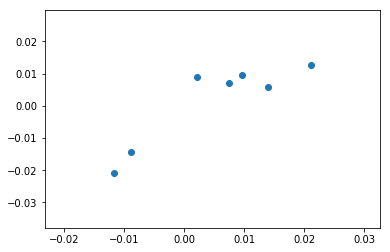

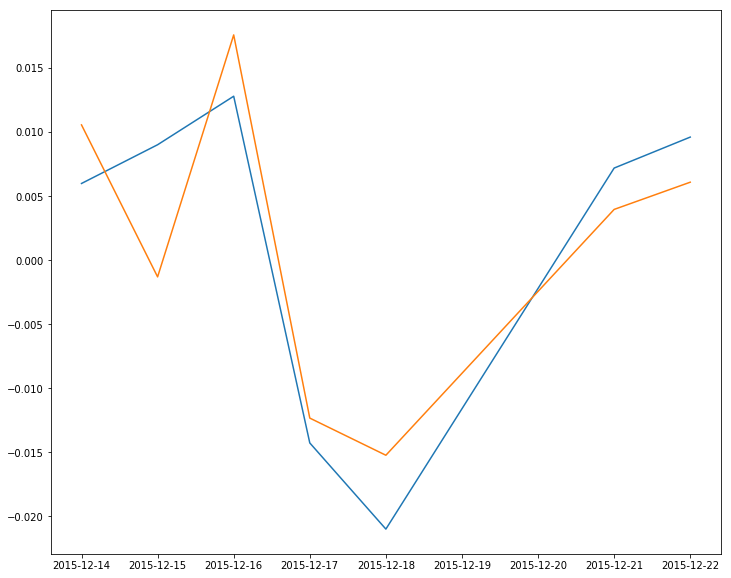

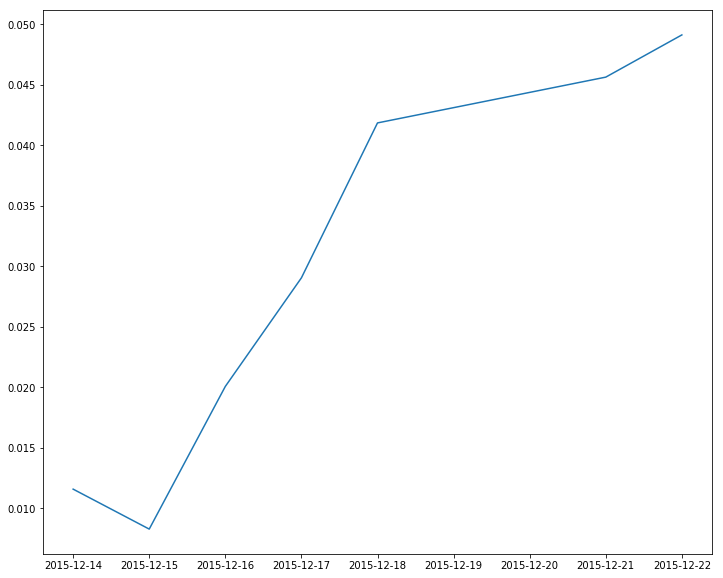

In [25]:
final = pd.DataFrame()
for index in range(30):
    i = data.loc[index]['Ticker']
    m = data.loc[index]['Market']
    year = data.loc[index]['Year']
    month = data.loc[index]['Month']
    day = data.loc[index]['Day']
    tbefore = 5
    tafter = 5
    company = data.loc[index]['Company Name']
    final[company] = func(i,m,year,month,day,tbefore,tafter)['cumu']
# final['all cumu'] = []

In [26]:
final

,DowDuPont Inc.,3M Co.,International Business Machines Corp.,Exxon Mobil Corp.,Chevron Corp.,Procter & Gamble Co.,Nike Inc. Cl B,Coca-Cola Co.,American Express Co.,VISA Inc. Cl A,...,McDonald's Corp.,Walt Disney Co.,Home Depot Inc.,Walgreens Boots Alliance Inc.,Walmart Inc.,Intel Corp.,Microsoft Corp.,Cisco Systems Inc.,Apple Inc.,Verizon Communications Inc.
Date,,,,,,,,,,,,,,,,,,,,,
2015-12-11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-12-14,-0.041992,0.016042,0.006682,0.021555,0.032275,0.003174,0.011376,0.000701,-0.006570,0.006334,...,-0.007489,0.006892,0.006258,0.010317,0.014490,0.001739,0.017786,0.010786,-0.015591,0.011580
2015-12-15,-0.059519,-0.046461,0.014268,0.064061,0.068445,0.015124,0.012845,0.009035,0.004013,0.023423,...,-0.016648,0.025785,-0.008050,0.002231,-0.002303,0.016121,0.013740,0.018809,-0.045876,0.008279
2015-12-16,-0.060630,-0.036652,0.015708,0.057029,0.072209,0.022727,0.022300,0.017242,0.000319,0.030981,...,-0.031158,0.031544,-0.008495,0.027906,0.002497,0.010661,0.021578,0.022848,-0.054970,0.020065
2015-12-17,-0.069769,-0.044737,0.011956,0.047740,0.047174,0.026924,0.038210,0.023881,-0.005454,0.026246,...,-0.003671,0.021199,-0.005326,0.020648,-0.012130,0.009712,0.022119,0.015127,-0.074320,0.029035
2015-12-18,-0.080935,-0.058023,0.018857,0.047063,0.047488,0.018250,0.053923,0.021777,-0.014068,0.010548,...,0.032639,-0.008308,0.008280,0.020830,-0.003708,-0.005267,0.003550,0.011455,-0.098010,0.041835
2015-12-21,-0.057141,-0.056331,0.018817,0.045214,0.039558,0.024399,0.061498,0.023728,-0.013372,0.017228,...,0.030089,-0.024656,0.009107,0.046728,0.004724,0.000718,0.010986,0.019514,-0.098733,0.045618
2015-12-22,-0.050325,-0.048501,0.030126,0.047845,0.048661,0.026349,0.072234,0.028843,-0.015873,0.013873,...,0.014260,-0.030364,0.003987,0.058445,0.016677,0.008394,0.016674,0.025031,-0.110808,0.049106


In [28]:
final.keys()

Index(['DowDuPont Inc.', '3M Co.', 'International Business Machines Corp.',
       'Exxon Mobil Corp.', 'Chevron Corp.', 'Procter & Gamble Co.',
       'Nike Inc. Cl B', 'Coca-Cola Co.', 'American Express Co.',
       'VISA Inc. Cl A', 'Goldman Sachs Group Inc.', 'UnitedHealth Group Inc.',
       'JPMorgan Chase & Co.', 'Travelers Cos. Inc.', 'Johnson & Johnson',
       'Merck & Co. Inc.', 'Pfizer Inc.', 'United Technologies Corp.',
       'Caterpillar Inc.', 'Boeing Co.', 'McDonald's Corp.', 'Walt Disney Co.',
       'Home Depot Inc.', 'Walgreens Boots Alliance Inc.', 'Walmart Inc.',
       'Intel Corp.', 'Microsoft Corp.', 'Cisco Systems Inc.', 'Apple Inc.',
       'Verizon Communications Inc.'],
      dtype='object')

In [29]:
final['uall'] = sum(final[i] for i in final.keys())

In [30]:
final

,DowDuPont Inc.,3M Co.,International Business Machines Corp.,Exxon Mobil Corp.,Chevron Corp.,Procter & Gamble Co.,Nike Inc. Cl B,Coca-Cola Co.,American Express Co.,VISA Inc. Cl A,...,Walt Disney Co.,Home Depot Inc.,Walgreens Boots Alliance Inc.,Walmart Inc.,Intel Corp.,Microsoft Corp.,Cisco Systems Inc.,Apple Inc.,Verizon Communications Inc.,uall
Date,,,,,,,,,,,,,,,,,,,,,
2015-12-11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-12-14,-0.041992,0.016042,0.006682,0.021555,0.032275,0.003174,0.011376,0.000701,-0.006570,0.006334,...,0.006892,0.006258,0.010317,0.014490,0.001739,0.017786,0.010786,-0.015591,0.011580,0.084015
2015-12-15,-0.059519,-0.046461,0.014268,0.064061,0.068445,0.015124,0.012845,0.009035,0.004013,0.023423,...,0.025785,-0.008050,0.002231,-0.002303,0.016121,0.013740,0.018809,-0.045876,0.008279,0.199721
2015-12-16,-0.060630,-0.036652,0.015708,0.057029,0.072209,0.022727,0.022300,0.017242,0.000319,0.030981,...,0.031544,-0.008495,0.027906,0.002497,0.010661,0.021578,0.022848,-0.054970,0.020065,0.331673
2015-12-17,-0.069769,-0.044737,0.011956,0.047740,0.047174,0.026924,0.038210,0.023881,-0.005454,0.026246,...,0.021199,-0.005326,0.020648,-0.012130,0.009712,0.022119,0.015127,-0.074320,0.029035,0.208546
2015-12-18,-0.080935,-0.058023,0.018857,0.047063,0.047488,0.018250,0.053923,0.021777,-0.014068,0.010548,...,-0.008308,0.008280,0.020830,-0.003708,-0.005267,0.003550,0.011455,-0.098010,0.041835,0.077528
2015-12-21,-0.057141,-0.056331,0.018817,0.045214,0.039558,0.024399,0.061498,0.023728,-0.013372,0.017228,...,-0.024656,0.009107,0.046728,0.004724,0.000718,0.010986,0.019514,-0.098733,0.045618,0.200188
2015-12-22,-0.050325,-0.048501,0.030126,0.047845,0.048661,0.026349,0.072234,0.028843,-0.015873,0.013873,...,-0.030364,0.003987,0.058445,0.016677,0.008394,0.016674,0.025031,-0.110808,0.049106,0.310032


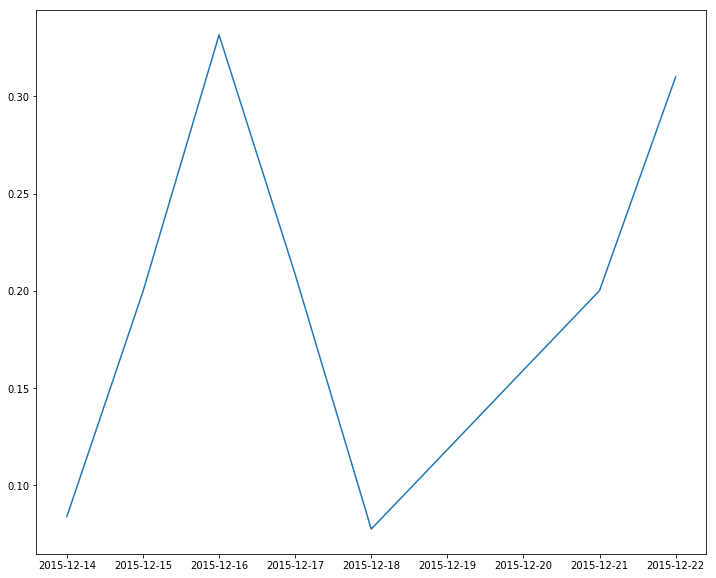

In [33]:
import pandas
import datetime
from datetime import timedelta
import pandas_datareader.data as web
import fix_yahoo_finance as yf
import matplotlib.pyplot as plt
import numpy as np
import statsmodels.api as sm
fig, ax = plt.subplots(figsize=(12,10))
ax.plot(final['uall'])